# Import

In [1]:
import pandas as pd 
import re #expression régulière 
import nltk #traitement naturel symbolique et statistique du langage anglais
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import ast 


nltk.download('stopwords')
nltk.download('wordnet')


df = pd.read_csv("data.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18461\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\18461\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.head()

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description
0,17167919,2017-04-25,3264223,2018-01-03,"['B23K26-361', 'H04M1-0266', 'B23K26-402', 'G0...","['C08J7-04', 'H04M1-02', 'G06F1-16', 'B23K26-3...","<!-- EPO <DP n=""18""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."
1,17166775,2017-04-18,3235458,2017-10-25,"['A61B17-68', 'A61B17-888', 'A61B17-8685', 'A6...","['A61B17-88', 'A61B17-68', 'A61B17-86']","<!-- EPO <DP n=""20""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">FIE..."
2,17166069,2017-04-11,3249094,2017-11-29,"['D06F58-206', 'D06F58-20']","['D06F58-20', 'D06F58-02']","<!-- EPO <DP n=""22""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
3,18771363,2018-03-05,3605724,2020-02-05,"['H01P1-2138', 'H01P5-107', 'H01P1-2088', 'H01...","['H01P3-12', 'H01P1-213', 'H01P5-107']","<!-- EPO <DP n=""62""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">Tec..."
4,19881950,2019-11-01,3713245,2020-09-23,"['H04N21-4345', 'H04N21-4821', 'H04N21-4316']","['H04N21-482', 'H04N21-262']","<!-- EPO <DP n=""14""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."


In [3]:
df.columns
df.dtypes #Normalement pas besoin de faire des conversions 

Numéro d'application      int64
Date d'application       object
Numero de publication     int64
date de publication      object
CPC                      object
IPC                      object
claim                    object
description              object
dtype: object

In [4]:
#Des valeurs manquantes ?
print(df.isnull().sum())

#Pas de valeur manquante 

Numéro d'application     0
Date d'application       0
Numero de publication    0
date de publication      0
CPC                      0
IPC                      0
claim                    0
description              0
dtype: int64


In [5]:
#Supprimer les doublons 
df = df.drop_duplicates()

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum()) #pas de doublons

Nombre de doublons : 0


In [6]:
df_sample = df.sample(n=1000, random_state=42)
df_sample

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description
33553,17159356,2017-03-06,3284640,2018-02-21,"['B60R22-20', 'Y10T24-4084', 'Y10T24-4019']",['B60R22-20'],"<!-- EPO <DP n=""16""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">BAC..."
9427,18853856,2018-09-05,3660649,2020-06-03,"['G06F3-0488', 'G06F3-0416', 'G06F2203-04808',...","['G06F3-041', 'G06F3-0488']","<!-- EPO <DP n=""11""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
199,18760974,2018-01-31,3591276,2020-01-08,"['F16L37-088', 'F16L37-0841']",['F16L37-088'],"<!-- EPO <DP n=""19""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">Tec..."
12447,19150079,2019-01-02,3678269,2020-07-08,"['H02H3-006', 'H02H7-26', 'H02H3-044']","['H02H3-00', 'H02H7-26']","<!-- EPO <DP n=""28""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."
39489,20855185,2020-07-17,4017072,2022-06-22,"['H04W24-02', 'H04W24-10']",['H04W24-02'],"<!-- EPO <DP n=""17""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
...,...,...,...,...,...,...,...,...
33981,17190400,2017-09-11,3337007,2018-06-20,"['F04B39-121', 'F04B39-0044', 'F04B35-045', 'H...","['F04F7-00', 'F16F7-10', 'H02K5-24', 'H02J9-06']","<!-- EPO <DP n=""59""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
31260,18184839,2018-07-20,3439347,2019-02-06,"['H04W12-08', 'H04L63-102', 'H04W12-06', 'H04L...","['H04W12-08', 'H04W12-06', 'H04L29-06']","<!-- EPO <DP n=""20""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
12292,19180813,2019-06-18,3697039,2020-08-19,"['H04L67-02', 'H04L47-125', 'H04L67-61', 'H04L...","['H04L29-08', 'H04L12-803']","<!-- EPO <DP n=""19""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>..."
42286,21152659,2021-01-21,4033161,2022-07-27,"['F24D19-0092', 'F24H9-2021', 'F24D2220-042']","['F24D19-00', 'F24H9-20']","<!-- EPO <DP n=""14""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001..."


# Tokenisation et lemmatisation

In [7]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Enlever les caractères spéciaux
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\s+', ' ', text)  # Enlever les espaces multiples
    return text

df_sample['claim_clean'] = df_sample['claim'].apply(clean_text)
df_sample['description_clean'] = df_sample['description'].apply(clean_text)


lemmatizer = WordNetLemmatizer() #réduit les mots, ex: running -> run
stop_words = set(stopwords.words('english')) #supp les mots inutiles comme "the" "and"

def preprocess_text(text):
    words = text.split()  # Tokenisation
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatisation et suppression des stopwords
    return ' '.join(words) #puis reconstitue en une phrase 

df_sample['claim_processed'] = df_sample['claim_clean'].apply(preprocess_text)
df_sample['description_processed'] = df_sample['description_clean'].apply(preprocess_text)


print(df_sample[['claim', 'claim_processed']].head())
print(df_sample[['description', 'description_processed']].head())

                                                   claim  \
33553  <!-- EPO <DP n="16"> --><claim id="c-en-0001" ...   
9427   <!-- EPO <DP n="11"> --><claim id="c-en-0001" ...   
199    <!-- EPO <DP n="19"> --><claim id="c-en-0001" ...   
12447  <!-- EPO <DP n="28"> --><claim id="c-en-0001" ...   
39489  <!-- EPO <DP n="17"> --><claim id="c-en-0001" ...   

                                         claim_processed  
33553  epo dp n 16 claim id c en 0001 num 0001 claim ...  
9427   epo dp n 11 claim id c en 0001 num 0001 claim ...  
199    epo dp n 19 claim id c en 0001 num 0001 claim ...  
12447  epo dp n 28 claim id c en 0001 num 0001 claim ...  
39489  epo dp n 17 claim id c en 0001 num 0001 claim ...  
                                             description  \
33553  <!-- EPO <DP n="1"> --><heading id="h0001">BAC...   
9427   <!-- EPO <DP n="1"> --><heading id="h0001"><b>...   
199    <!-- EPO <DP n="1"> --><heading id="h0001">Tec...   
12447  <!-- EPO <DP n="1"> --><p id="p0001" n

In [8]:
df_sample

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,IPC,claim,description,claim_clean,description_clean,claim_processed,description_processed
33553,17159356,2017-03-06,3284640,2018-02-21,"['B60R22-20', 'Y10T24-4084', 'Y10T24-4019']",['B60R22-20'],"<!-- EPO <DP n=""16""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">BAC...",epo dp n 16 claim id c en 0001 num 0001 claim...,epo dp n 1 heading id h0001 background headin...,epo dp n 16 claim id c en 0001 num 0001 claim ...,epo dp n 1 heading id h0001 background heading...
9427,18853856,2018-09-05,3660649,2020-06-03,"['G06F3-0488', 'G06F3-0416', 'G06F2203-04808',...","['G06F3-041', 'G06F3-0488']","<!-- EPO <DP n=""11""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 11 claim id c en 0001 num 0001 claim...,epo dp n 1 heading id h0001 b technical field...,epo dp n 11 claim id c en 0001 num 0001 claim ...,epo dp n 1 heading id h0001 b technical field ...
199,18760974,2018-01-31,3591276,2020-01-08,"['F16L37-088', 'F16L37-0841']",['F16L37-088'],"<!-- EPO <DP n=""19""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001"">Tec...",epo dp n 19 claim id c en 0001 num 0001 claim...,epo dp n 1 heading id h0001 technical field h...,epo dp n 19 claim id c en 0001 num 0001 claim ...,epo dp n 1 heading id h0001 technical field he...
12447,19150079,2019-01-02,3678269,2020-07-08,"['H02H3-006', 'H02H7-26', 'H02H3-044']","['H02H3-00', 'H02H7-26']","<!-- EPO <DP n=""28""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001...",epo dp n 28 claim id c en 0001 num 0001 claim...,epo dp n 1 p id p0001 num 0001 the present in...,epo dp n 28 claim id c en 0001 num 0001 claim ...,epo dp n 1 p id p0001 num 0001 present inventi...
39489,20855185,2020-07-17,4017072,2022-06-22,"['H04W24-02', 'H04W24-10']",['H04W24-02'],"<!-- EPO <DP n=""17""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 17 claim id c en 0001 num 0001 claim...,epo dp n 1 heading id h0001 b cross reference...,epo dp n 17 claim id c en 0001 num 0001 claim ...,epo dp n 1 heading id h0001 b cross reference ...
...,...,...,...,...,...,...,...,...,...,...,...,...
33981,17190400,2017-09-11,3337007,2018-06-20,"['F04B39-121', 'F04B39-0044', 'F04B35-045', 'H...","['F04F7-00', 'F16F7-10', 'H02K5-24', 'H02J9-06']","<!-- EPO <DP n=""59""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 59 claim id c en 0001 num 0001 claim...,epo dp n 1 heading id h0001 b field b heading...,epo dp n 59 claim id c en 0001 num 0001 claim ...,epo dp n 1 heading id h0001 b field b heading ...
31260,18184839,2018-07-20,3439347,2019-02-06,"['H04W12-08', 'H04L63-102', 'H04W12-06', 'H04L...","['H04W12-08', 'H04W12-06', 'H04L29-06']","<!-- EPO <DP n=""20""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 20 claim id c en 0001 num 0001 claim...,epo dp n 1 heading id h0001 b field of techno...,epo dp n 20 claim id c en 0001 num 0001 claim ...,epo dp n 1 heading id h0001 b field technology...
12292,19180813,2019-06-18,3697039,2020-08-19,"['H04L67-02', 'H04L47-125', 'H04L67-61', 'H04L...","['H04L29-08', 'H04L12-803']","<!-- EPO <DP n=""19""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><heading id=""h0001""><b>...",epo dp n 19 claim id c en 0001 num 0001 claim...,epo dp n 1 heading id h0001 b technical field...,epo dp n 19 claim id c en 0001 num 0001 claim ...,epo dp n 1 heading id h0001 b technical field ...
42286,21152659,2021-01-21,4033161,2022-07-27,"['F24D19-0092', 'F24H9-2021', 'F24D2220-042']","['F24D19-00', 'F24H9-20']","<!-- EPO <DP n=""14""> --><claim id=""c-en-0001"" ...","<!-- EPO <DP n=""1""> --><p id=""p0001"" num=""0001...",epo dp n 14 claim id c en 0001 num 0001 claim...,epo dp n 1 p id p0001 num 0001 the present in...,epo dp n 14 claim id c

# IPC ET CPC

## IPC

33553                  ['B60R22-20']
9427     ['G06F3-041', 'G06F3-0488']
199                   ['F16L37-088']
12447       ['H02H3-00', 'H02H7-26']
39489                  ['H04W24-02']
Name: IPC, dtype: object
[<class 'str'>]
33553             [B]
9427           [G, G]
199               [F]
12447          [H, H]
39489             [H]
             ...     
33981    [F, F, H, H]
31260       [H, H, H]
12292          [H, H]
42286          [F, F]
13664    [G, G, G, G]
Name: IPC_first_letter, Length: 1000, dtype: object


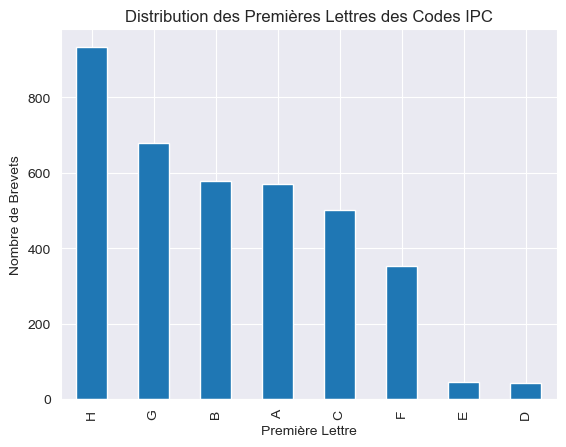

In [9]:
#IPC
#df['IPC']

#Extraire la première lettre 
print(df_sample['IPC'].head())
print(df_sample['IPC'].apply(type).unique())

def extract_first_letter(ipc_codes):
    #Transformer en liste la chaine de caractère 
    try:
        ipc_codes = eval(ipc_codes)
    except:
        return []

    if isinstance(ipc_codes, list):  # Vérifier que c'est bien une liste
        return [code[0] for code in ipc_codes if isinstance(code, str)]  # Vérifier que chaque élément est une chaîne
    return []

# créa de la colonne IPC avec la première lettre 
df_sample['IPC_first_letter'] = df_sample['IPC'].apply(extract_first_letter)
print(df_sample['IPC_first_letter'])

ipc_first_letter_counts = df_sample['IPC_first_letter'].explode().value_counts()

# dist de IPC
ipc_first_letter_counts.plot(kind='bar')
plt.title('Distribution des Premières Lettres des Codes IPC')
plt.xlabel('Première Lettre')
plt.ylabel('Nombre de Brevets')
plt.show()

## CPC

33553          ['B60R22-20', 'Y10T24-4084', 'Y10T24-4019']
9427     ['G06F3-0488', 'G06F3-0416', 'G06F2203-04808',...
199                          ['F16L37-088', 'F16L37-0841']
12447               ['H02H3-006', 'H02H7-26', 'H02H3-044']
39489                           ['H04W24-02', 'H04W24-10']
Name: CPC, dtype: object
[<class 'str'>]
33553             [B, Y, Y]
9427           [G, G, G, G]
199                  [F, F]
12447             [H, H, H]
39489                [H, H]
                ...        
33981          [F, F, F, H]
31260          [H, H, H, H]
12292    [H, H, H, H, H, H]
42286             [F, F, F]
13664                [G, G]
Name: CPC_first_letter, Length: 1000, dtype: object


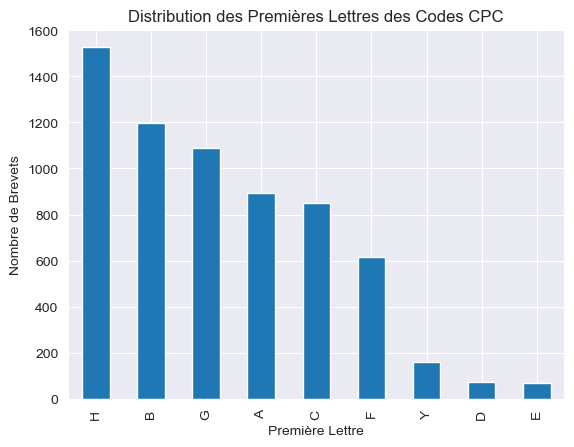

In [10]:
#CPC

#Extraire la première lettre 
print(df_sample['CPC'].head())
print(df_sample['CPC'].apply(type).unique())

def extract_first_letter(cpc_codes):
    #Transformer en liste la chaine de caractère 
    try:
        cpc_codes = eval(cpc_codes)
    except:
        return []

    if isinstance(cpc_codes, list):  # Vérifier que c'est bien une liste
        return [code[0] for code in cpc_codes if isinstance(code, str)]  # Vérifier que chaque élément est une chaîne
    return []

# créa de la colonne 1 letter cpc 
df_sample['CPC_first_letter'] = df_sample['CPC'].apply(extract_first_letter)
print(df_sample['CPC_first_letter'])

cpc_first_letter_counts = df_sample['CPC_first_letter'].explode().value_counts()

# la dist des CPC
cpc_first_letter_counts.plot(kind='bar')
plt.title('Distribution des Premières Lettres des Codes CPC')
plt.xlabel('Première Lettre')
plt.ylabel('Nombre de Brevets')
plt.show()

## Drop Colonne inutile 

In [11]:
#ipc on va essayer de prendre juste les 4premiers caractères des variables de la colonne IPC -> demander aux autres 


#on peut supp les colonnes : claim, description, claim_clean, description_clean, claim_processed, description_processed à confirmer avec harish 
df_sample = df_sample.drop(['claim','description', 'claim_clean', 'description_clean', 'description_processed', 'IPC','IPC_first_letter'], axis=1)
df_sample.head()

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,claim_processed,CPC_first_letter
33553,17159356,2017-03-06,3284640,2018-02-21,"['B60R22-20', 'Y10T24-4084', 'Y10T24-4019']",epo dp n 16 claim id c en 0001 num 0001 claim ...,"[B, Y, Y]"
9427,18853856,2018-09-05,3660649,2020-06-03,"['G06F3-0488', 'G06F3-0416', 'G06F2203-04808',...",epo dp n 11 claim id c en 0001 num 0001 claim ...,"[G, G, G, G]"
199,18760974,2018-01-31,3591276,2020-01-08,"['F16L37-088', 'F16L37-0841']",epo dp n 19 claim id c en 0001 num 0001 claim ...,"[F, F]"
12447,19150079,2019-01-02,3678269,2020-07-08,"['H02H3-006', 'H02H7-26', 'H02H3-044']",epo dp n 28 claim id c en 0001 num 0001 claim ...,"[H, H, H]"
39489,20855185,2020-07-17,4017072,2022-06-22,"['H04W24-02', 'H04W24-10']",epo dp n 17 claim id c en 0001 num 0001 claim ...,"[H, H]"


## Affichage des 3 premiers caractères du brevet

In [12]:
#est un outil puissant pour l'analyse, la transformation et la manipulation de code source Python. Elle est particulièrement utile pour les tâches qui nécessitent une compréhension approfondie de la structure syntaxique du code.


#on se concentre sur CPC et on se base 2 niveaux donc les 3 premiers caractères du CPC

#comme CPC est de type object donc chaine de caractère il faut qu'on le convertisse en liste pour recup les 3 prem carac
def convert_list(cpc_string):
    try:
        return ast.literal_eval(cpc_string)
    except:
        return []
    
df_sample['CPC'] = df_sample['CPC'].apply(convert_list)

#On extrait les 3 prem carac + supp les doublons 
def extract_three_first_carac(cpc_codes):
    if isinstance(cpc_codes, list):
        cpc_three_car = [code[:3] for code in cpc_codes]
        return list(set(cpc_three_car)) #suppression des doublons 
  
    else:
        return []

df_sample['CPC_three_car'] = df_sample['CPC'].apply(extract_three_first_carac)
print(df_sample[['CPC', 'CPC_three_car']])

                                                     CPC CPC_three_car
33553              [B60R22-20, Y10T24-4084, Y10T24-4019]    [B60, Y10]
9427   [G06F3-0488, G06F3-0416, G06F2203-04808, G06F2...         [G06]
199                            [F16L37-088, F16L37-0841]         [F16]
12447                   [H02H3-006, H02H7-26, H02H3-044]         [H02]
39489                             [H04W24-02, H04W24-10]         [H04]
...                                                  ...           ...
33981    [F04B39-121, F04B39-0044, F04B35-045, H02J9-06]    [H02, F04]
31260    [H04W12-08, H04L63-102, H04W12-06, H04L63-0861]         [H04]
12292  [H04L67-02, H04L47-125, H04L67-61, H04L67-1001...         [H04]
42286            [F24D19-0092, F24H9-2021, F24D2220-042]         [F24]
13664                            [G06F21-86, G06F21-554]         [G06]

[1000 rows x 2 columns]


## Nettoyage de la colonne claim_processed avant la vectorisation

In [13]:
def clean_text(text):
    text = re.sub(r'epo dp n \d+', '', text)
    # Enlever les chiffres
    text = re.sub(r'\d+', '', text)
    # Enlever les mots redondants définis
    text = re.sub(r'\b(claim text|claim|br|num|id|c en)\b', '', text)
     # Supprimer les espaces en trop
    text = re.sub(r'\s+', ' ', text)  # Remplace tout espace blanc par un seul espace
    text = text.strip()  # Enlève les espaces au début et à la fin
    return text

# Application de la fonction de nettoyage
df_sample['claim_processed_clean'] = df_sample['claim_processed'].apply(clean_text)
df_sample

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,claim_processed,CPC_first_letter,CPC_three_car,claim_processed_clean
33553,17159356,2017-03-06,3284640,2018-02-21,"[B60R22-20, Y10T24-4084, Y10T24-4019]",epo dp n 16 claim id c en 0001 num 0001 claim ...,"[B, Y, Y]","[B60, Y10]",webbing adjustment device seat belt system b c...
9427,18853856,2018-09-05,3660649,2020-06-03,"[G06F3-0488, G06F3-0416, G06F2203-04808, G06F2...",epo dp n 11 claim id c en 0001 num 0001 claim ...,"[G, G, G, G]",[G06],fusion method touch message comprising pushing...
199,18760974,2018-01-31,3591276,2020-01-08,"[F16L37-088, F16L37-0841]",epo dp n 19 claim id c en 0001 num 0001 claim ...,"[F, F]",[F16],pipe connector comprising housing insertion ho...
12447,19150079,2019-01-02,3678269,2020-07-08,"[H02H3-006, H02H7-26, H02H3-044]",epo dp n 28 claim id c en 0001 num 0001 claim ...,"[H, H, H]",[H02],method configuring protection unit a a a a a a...
39489,20855185,2020-07-17,4017072,2022-06-22,"[H04W24-02, H04W24-10]",epo dp n 17 claim id c en 0001 num 0001 claim ...,"[H, H]",[H04],method processing abnormal terminal device com...
...,...,...,...,...,...,...,...,...,...
33981,17190400,2017-09-11,3337007,2018-06-20,"[F04B39-121, F04B39-0044, F04B35-045, H02J9-06]",epo dp n 59 claim id c en 0001 num 0001 claim ...,"[F, F, F, H]","[H02, F04]",method operation least one generator system me...
31260,18184839,2018-07-20,3439347,2019-02-06,"[H04W12-08, H04L63-102, H04W12-06, H04L63-0861]",epo dp n 20 claim id c en 0001 num 0001 claim ...,"[H, H, H, H]",[H04],method applying privacy filter display electro...
12292,19180813,2019-06-18,3697039,2020-08-19,"[H04L67-02, H04L47-125, H04L67-61, H04L67-1001...",epo dp n 19 claim id c en 0001 num 0001 claim ...,"[H, H, H, H, H, H]",[H04],method comprising receiving intermediate devic...
42286,21152659,2021-01-21,4033161,2022-07-27,"[F24D19-0092, F24H9-2021, F24D2220-042]",epo dp n 14 claim id c en 0001 num 0001 claim ...,"[F, F, F]",[F24],method controlling household appliance compris...


## Import sklearn pour les models

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
import xgboost as xgb
import numpy as np

In [15]:
df_sample

,Numéro d'application,Date d'application,Numero de publication,date de publication,CPC,claim_processed,CPC_first_letter,CPC_three_car,claim_processed_clean
33553,17159356,2017-03-06,3284640,2018-02-21,"[B60R22-20, Y10T24-4084, Y10T24-4019]",epo dp n 16 claim id c en 0001 num 0001 claim ...,"[B, Y, Y]","[B60, Y10]",webbing adjustment device seat belt system b c...
9427,18853856,2018-09-05,3660649,2020-06-03,"[G06F3-0488, G06F3-0416, G06F2203-04808, G06F2...",epo dp n 11 claim id c en 0001 num 0001 claim ...,"[G, G, G, G]",[G06],fusion method touch message comprising pushing...
199,18760974,2018-01-31,3591276,2020-01-08,"[F16L37-088, F16L37-0841]",epo dp n 19 claim id c en 0001 num 0001 claim ...,"[F, F]",[F16],pipe connector comprising housing insertion ho...
12447,19150079,2019-01-02,3678269,2020-07-08,"[H02H3-006, H02H7-26, H02H3-044]",epo dp n 28 claim id c en 0001 num 0001 claim ...,"[H, H, H]",[H02],method configuring protection unit a a a a a a...
39489,20855185,2020-07-17,4017072,2022-06-22,"[H04W24-02, H04W24-10]",epo dp n 17 claim id c en 0001 num 0001 claim ...,"[H, H]",[H04],method processing abnormal terminal device com...
...,...,...,...,...,...,...,...,...,...
33981,17190400,2017-09-11,3337007,2018-06-20,"[F04B39-121, F04B39-0044, F04B35-045, H02J9-06]",epo dp n 59 claim id c en 0001 num 0001 claim ...,"[F, F, F, H]","[H02, F04]",method operation least one generator system me...
31260,18184839,2018-07-20,3439347,2019-02-06,"[H04W12-08, H04L63-102, H04W12-06, H04L63-0861]",epo dp n 20 claim id c en 0001 num 0001 claim ...,"[H, H, H, H]",[H04],method applying privacy filter display electro...
12292,19180813,2019-06-18,3697039,2020-08-19,"[H04L67-02, H04L47-125, H04L67-61, H04L67-1001...",epo dp n 19 claim id c en 0001 num 0001 claim ...,"[H, H, H, H, H, H]",[H04],method comprising receiving intermediate devic...
42286,21152659,2021-01-21,4033161,2022-07-27,"[F24D19-0092, F24H9-2021, F24D2220-042]",epo dp n 14 claim id c en 0001 num 0001 claim ...,"[F, F, F]",[F24],method controlling household appliance compris...


## la vectorization du texte

In [ ]:
df_sample.to_csv("test.csv", index=False)

La methode Tfidf

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
texts = df_sample['claim_processed_clean'].fillna('')

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())
print(X.shape)

['_pre' '_th' 'a_' ... 'σε' 'τn' 'ωr']
(1000, 11298)


In [20]:
print(texts)

33553    webbing adjustment device seat belt system b c...
9427     fusion method touch message comprising pushing...
199      pipe connector comprising housing insertion ho...
12447    method configuring protection unit a a a a a a...
39489    method processing abnormal terminal device com...
                               ...                        
33981    method operation least one generator system me...
31260    method applying privacy filter display electro...
12292    method comprising receiving intermediate devic...
42286    method controlling household appliance compris...
13664    method activating least one sensor among plura...
Name: claim_processed_clean, Length: 1000, dtype: object


La methode Word Embedding

In [34]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
data = pd.read_csv("test.csv")
#data = df_sample


print(data.columns)


print(data['CPC_first_letter'].head())


texts = data['claim_processed_clean'].fillna('')


def extract_first_element(x):
    if isinstance(x, str) and x.startswith('[') and x.endswith(']'):
        # 解析字符串形式的列表
        x = eval(x)
    if isinstance(x, list) and len(x) > 0:
        return x[0]
    else:
        return 'Unknown'

labels = data['CPC_first_letter'].apply(extract_first_element).fillna('Unknown')


unique_labels = labels.unique()
print(f"Unique labels before encoding: {len(unique_labels)}")
print(unique_labels)


sentences = [text.split() for text in texts]


word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


def text_to_vector(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

X = np.array([text_to_vector(text, word2vec_model) for text in texts])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_cleaned = labels[labels.isin(unique_labels)] 
y = label_encoder.fit_transform(labels_cleaned)

encoded_unique_labels = np.unique(y)
print(f"Unique labels after encoding: {len(encoded_unique_labels)}")
print(encoded_unique_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

Index(['Numéro d'application', 'Date d'application', 'Numero de publication',
       'date de publication', 'CPC', 'claim_processed', 'CPC_first_letter',
       'CPC_three_car', 'claim_processed_clean'],
      dtype='object')
0         ['B', 'Y', 'Y']
1    ['G', 'G', 'G', 'G']
2              ['F', 'F']
3         ['H', 'H', 'H']
4              ['H', 'H']
Name: CPC_first_letter, dtype: object
Unique labels before encoding: 8
['B' 'G' 'F' 'H' 'A' 'C' 'E' 'D']
Unique labels after encoding: 8
[0 1 2 3 4 5 6 7]
              precision    recall  f1-score   support

           A       0.15      0.20      0.17        20
           B       0.39      0.48      0.43        29
           C       0.70      0.83      0.76        23
           D       0.00      0.00      0.00         1
           E       0.00      0.00      0.00         3
           F       0.62      0.30      0.41        33
           G       0.61      0.62      0.62        48
           H       0.49      0.51      0.50        43

 

C:\Users\18461\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\18461\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\18461\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
